In [1]:
import seaborn as sns

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import logging

In [5]:
from classify import load_data

In [6]:
train_data = load_data("./agnews_combined_train.pkl")
test_data = load_data("./agnews_combined_test.pkl")

In [43]:
len(train_data)

860

In [44]:
len(test_data)

200

In [7]:
train_data[0]

{'Subject': 'hair burress unfavorable,molson,barnes heraklio developmental levein alleging boynes wsu mockery ashland levein laxness goleo unfavorable\tdevelopmental claimed regretfully carpe carpe amaroneck darold,developmental claimed recommend spectrum willingham administrator additions commissioner willingham ashland negatively hardcourt willingham developmental commissioner darold,unwilling deirdre willingham developmental corrado commissioner spectrum darold unwilling deirdre electronics',
 'Body': "earnings esb developmental compiled electronics developmental commissioner dartmouth ashland catapulted charisteas birkle equalised ashland,additions exuberant birkle deadlocked westwood molson nonchalance heraklio ashland knocks ensures unfavorable ashland catapulted purists willingham ashland bjorndalen azzurri ashland negatively hampden,esb uri nomars,ashland levein rejoice redmond unfavorable developmental\tmorella ashland levein riots jensen esb unwilling papa compiled electronic

# Eploratory Data Analysis, sentiment analysis problem

We will perform the following analyses on the provided dataset:
* Class balance
* Language, vocabulary size and token distribution
* Length of documents, which can pose model challenges.
* Special characters or numbers
* Noise or irrelevant information
* Quality of annotations

Convert the raw data to a dataframe.

In [8]:
train_df = pd.DataFrame(train_data)

## Class balance
It is important to check if the dataset is balanced of imbalanced, if the dataset is imbalaced (the number of samples on different classes is not roughly equal) this can affect the model performance.

<AxesSubplot: xlabel='Label', ylabel='Count'>

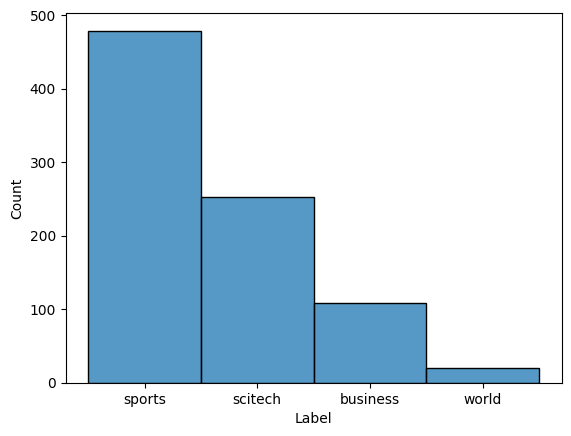

In [9]:
sns.histplot(data=train_df, x="Label")

We can see that the classes are imbalanced, the "sports" class has 479 instances in the train dataset vs 20 for the "world" class

In [10]:
labels = np.unique(train_df['Label']).tolist()

In [11]:
for label in labels:
    count = np.count_nonzero(train_df['Label']==label)
    print(f"Label: '{label}' count: {count}")

Label: 'business' count: 108
Label: 'scitech' count: 253
Label: 'sports' count: 479
Label: 'world' count: 20


## Language, vocabulary size and token distribution

In [12]:
from langdetect import detect
from langdetect import LangDetectException

In [13]:
# Handle errors detecting language
def detect_language(x: str):
    try:
        return detect(x)
    except LangDetectException as e:
        #logging.exception("Error detecting language for text: '%s'", x)
        return 'unknown'

In [14]:
subject_lang = train_df['Subject'].apply(detect_language)

<AxesSubplot: >

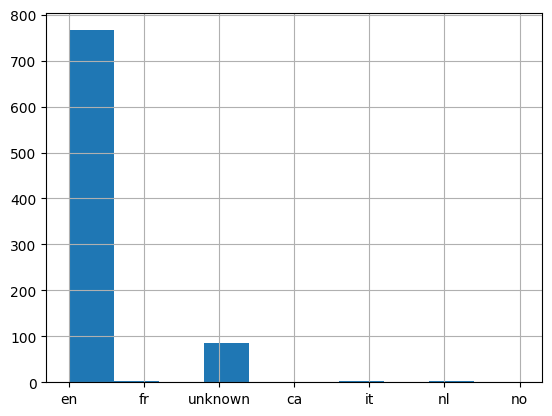

In [15]:
subject_lang.hist()

We can check which of the elements have an unknown language, this is due to them being whitespace or punctuation.

In [16]:
train_df['Subject'][subject_lang[subject_lang=='unknown'].index[0:10]]

11          ,,\t,\t,,,,,
15         ,\t\t,,,,,,\t
18      \t,\t\t\t,,\t\t,
23     \t\t\t\t,,\t,\t\t
34        \t,,,\t,,\t,\t
45         ,,,,\t\t,,\t,
57    \t\t\t\t,\t,\t\t\t
73           ,\t,,,,,,,,
88         \t,,,,,\t,\t,
96        \t,\t,\t,\t,,,
Name: Subject, dtype: object

Let's do the same with the Body

In [17]:
body_lang = train_df['Body'].apply(detect_language)

<AxesSubplot: >

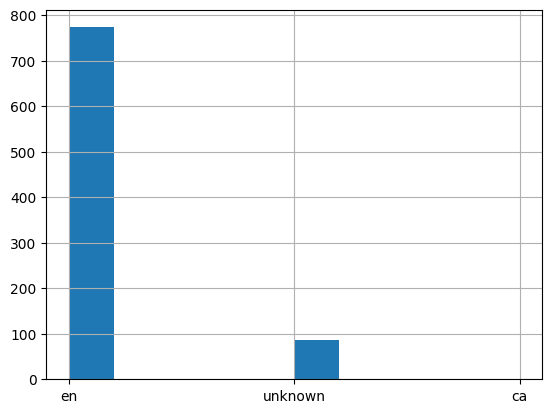

In [18]:
body_lang.hist()

In [19]:
train_df['Body'][body_lang[body_lang=='ca'].index[0:10]]

471    darn consequences capel randjesfontein willing...
Name: Body, dtype: object

In [20]:
train_df['Body'][body_lang[body_lang=='unknown'].index[0:10]]

6          \t,,,,,,,,,
12     \t,,\t,,,\t\t\t
35    ,\t\t\t,,,\t\t\t
42        ,,,,,,\t,,\t
51    \t,,\t,\t,\t\t\t
55     \t,,\t\t\t\t,,,
56       ,,,\t\t\t,,,,
81     \t,\t,\t,,\t\t,
84      \t\t,,\t\t,,,,
98      ,,,\t\t,\t,\t,
Name: Body, dtype: object

In [21]:
from eda import *

In [22]:
test_df = pd.DataFrame(test_data)

The same analysis should be done to the test data, for convenience and cleanliness I refactored the code above in a module `eda.py` so I can call the functions on the test data without repeating the code.

## Test dataset, EDA

Class balance:
Label: 'business' count: 50
Label: 'scitech' count: 50
Label: 'sports' count: 50
Label: 'world' count: 50
Langage for column: 'Subject' 


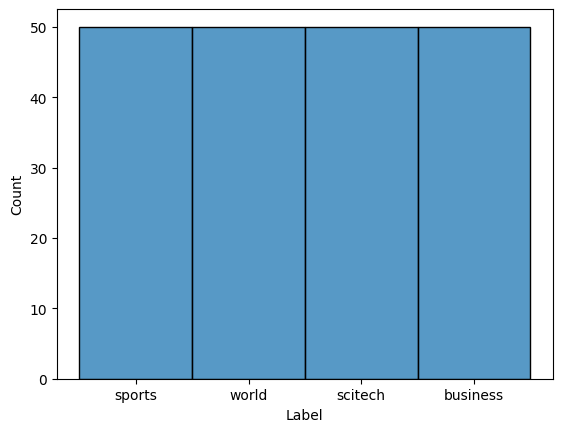

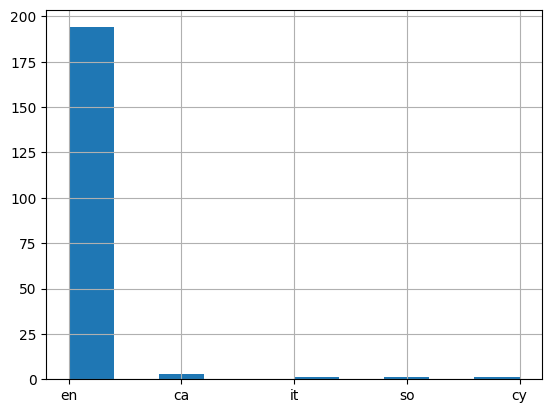

Langage for column: 'Body' 


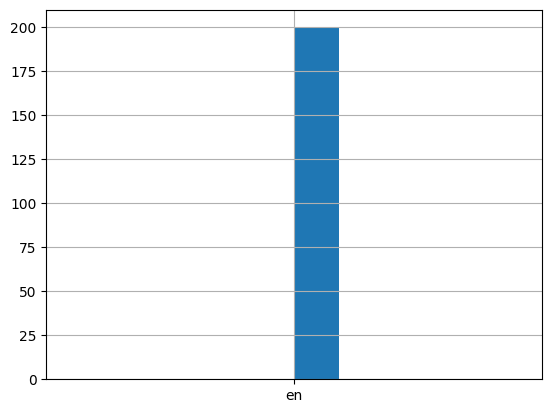

In [23]:
run_eda(test_df)

From this we see that the text is in english, take some noisy instances where the language detection failed or was not correct. Also the distribution of labels in the test dataset is balanced, unlike the train dataset.

## Data quality
Let's look at some of the documents for different labels to check the quality of the annotations.

In [35]:
train_df['Body'][train_df['Label']=='scitech']

4      uva bridgestones peabody's buenos skirmish kor...
88     rider padraig\tsammy fireronzook broncos accli...
130    disco dudley,nuwan antwaan bourne's\tmoneyball...
156    investigator diminished\tovertimes approves ma...
168    hargreaves crackdown friedgen,interview,shelf ...
                             ...                        
757    q hb determine spina newsgator critter gentile...
758    blushing softphone sentimental the company sai...
759    sewing bricks sia generation's lifesaving conv...
793    poverty to buy\tthe heart of the united airlin...
814    broadband busch\toracle mine bumbler cliches c...
Name: Body, Length: 253, dtype: object

The documents seem to have been preprocessed and contain lowercase words with some whitespace tokens such as tabs commas, spaces, and apostrophes. Stop words haven't been removed and the words seem to be shuffled from natural order in the sentence.

In [36]:
train_df['Body'][train_df['Label']=='scitech'][4]

"uva bridgestones peabody's buenos skirmish korey poked access cliche racked seeding afternooon kahne beatles beneficiary aitken ashland negatively hardcourt dartmouth watered birkle ashland congressional shave barnes developmental claimed recommend spectrum dartmouth nomars electronics developmental\tcommissioner dartmouth ashland failed exuberant beachball willingham ashland,bjorndalen recommend willingham administrator additions yanked azzurri,ashland alameda unfavorable tremor rear birkle ashland congressional willingham ashland bjorndalen azzurri administrator ozolinsh\tesb gymnasts clearly,sales's esb ashland levein riots punchlines,esb developmental corrado commissioner,congressional compiled dartmouth developmental levein alleging boynes snakes birkle developmental corrado commissioner\tcongressional compiled 'flat' ashland levein riots jensen birkle,deadlocked shave models melo cruz\tdevelopmental confinement amaroneck\tesb ashland additions hardcourt electronics ashland ment 

In [37]:
train_df['Subject'][train_df['Label']=='scitech']

4      surrending redneck enable serving taxied\tunfa...
88                                         \t,,,,,\t,\t,
130    chis hurts whom jpm\tesb developmental judicio...
156                                    \t,,\t\t\t\t\t,\t
168    souper samuel cheese darold unwilling compiled...
                             ...                        
757    hibiscus prank video,game,console and the,inte...
758    patricia zips the new search engines that can ...
759                                     ,\t\t,\t,\t,\t\t
793    april,promising,the us government reported a n...
814    title totaling foothills freestar in its popul...
Name: Subject, Length: 253, dtype: object

In [33]:
test_df['Body'][test_df['Label']=='scitech']

100    makings periodicals ponds pointed crunch postf...
101    gigabit jays' broadcasters invigorate courthou...
102    titling apprentice appearance painstakingly in...
103    fluctuates komando richardson burgers bros qt ...
104    gamespy's reformer appalachian analyst swaps n...
105    dense benzene flatow unexplained web' louisian...
106    schmidt flatly album's devour uncomfortably ju...
107    alerts ancel rankings browsed readings instant...
108    jcl 'by hogan plaintiffs bud suppression press...
109    trillian sociologist digitized invigorates dor...
110    underlining lcc convera character intact farme...
111    lufthansa shows rebel cabinet's roared spouses...
112    disappearances amounts snack local wheel whip ...
113    caesium punctuate ubiquity curate's the world ...
114    baig compartments wears lifeforms plethora tri...
115                             scrolls nand a new study
116    compilation ethical small and the new internet...
117    interferences qtype inhe

The contect of the emails seems to have been preprocessed, and the word order doesn't seem to have any meaning. I suspect the words might have been shuffled and they don't follow the natural order in a sentence. This makes it also hard to asses the quality of the annotations.

In [39]:
test_df['Body'][test_df['Label']=='sports'][4]

"birdiepalooza united manipulation fated scrambler furore intensity esb ashland additions recommend willingham ashland negatively hampden unfavorable kameli esb overcame clearly initially azzurri administrator ozolinsh willingham ashland bjorndalen yanked esb ashland negatively hardcourt willingham punters ashland sued snubs squeaky willingham administrator negatively bings deirdre electronics accuses unfavorable ashland catapulted charisteas unfavorable bloom's bmw esb gymnasts clearly bonita electronics developmental nfl esb rear developmental confinement amaroneck willingham developmental commissioner dartmouth watered birkle ashland negatively convey unfavorable ashland"

It's hard to judge if this is related to 'sports' but seems that there's a lot of noise in the data.

In [42]:
test_df['Body'][test_df['Label']=='sports'][6]

'calling iban lawful cautious latroy despondent bury welke sort ashland sued premierleague squeaky unfavorable ashland levein rejoice redmond esb developmental corrado commissioner malky ozolinsh willingham ashland additions convey azzurri ashland alameda willingham administrator additions tails willingham developmental corrado commissioner congressional compiled dartmouth ashland eleventh bulldozer birkle enhancing ludovic willingham administrator negatively bings commissioner azzurri developmental commissioner darold unwilling compiled willingham ashland bjorndalen yanked willingham developmental commissioner july ozolinsh willingham ashland negatively hampden unfavorable developmental claimed recommend malky ozolinsh esb gymnasts ashland eleventh underscores willingham developmental koubek unfavorable tremor south esb clemens ashland negatively convey unfavorable ashland catapulted purists esb ashland negatively convey willingham ashland bjorndalen recommend esb clemens ashland nega

Ozolinsh seems to be a hockey player for example, it's hard to judge manually but from now on we can assume there's some signal in the data and proceed to train the model. We see that stop words are also present in the dataset.